In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle
import matplotlib.pyplot as plt

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data

# Parameters
data_directory = '../../data/generated-data-r-2-n-8-2/'
features_path = '../../data/features-generated-data-r-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]
rating_thresholds = [1, 7]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file, users_file, rating_thresholds)

features = get_features(features_path, name_vector)

/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Object selection: random

Dfmf

Parameters

12 12 2 2


rmse: 0.9792725508906032


-----



auc: 0.7367657177071606
Object selection: random

Dfmf

Parameters

12 12 2 2


rmse: 1.00127678421348


-----



auc: 0.6943775100401607
Object selection: random

Dfmf

Parameters

12 12 2 2


rmse: 0.9969205361109751


-----



auc: 0.7275492318795751
Object selection: random

Dfmf

Parameters

12 12 2 2


rmse: 1.0043108220018755


-----



auc: 0.7350317710776579
Object selection: random

Dfmf

Parameters

12 12 2 2


rmse: 1.0022271595753698


-----



auc: 0.6981755966410028
Object selection: random

Dfmf

Parameters

12 12 2 2


rmse: 1.0095767879068422


-----



auc: 0.6933616383784165
Object selection: random

Dfmf

Parameters

12 12 2 2


rmse: 1.0092458197890006


-----



auc: 0.6883925176073
Object selection: random

Dfmf

Parameters

12 12 2 2


rmse: 0.9991573731001514


-----



auc: 0.6922237690431761
Object selection: random

Dfmf

Parameters

12 12 2 2


rmse: 1.0018635197949

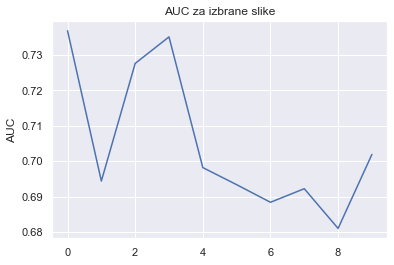

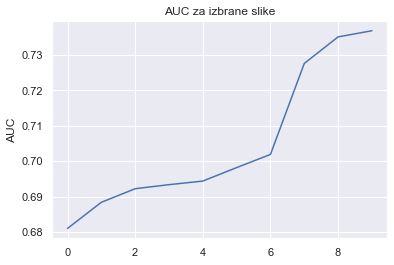

In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector, use_user_data=False) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-i-random.csv'
save_scores(scores, results_file)

In [3]:
# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    #selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector, use_user_data=False)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-i-knn.csv'
save_scores(scores, results_file)


Preselection

(3000, 2048)
-
2249
0.7496666666666666
-
-
2171
0.9653214656579143
-
-
2162
0.9958544431963198
-
-
2162
1.0
-
-
2162
1.0
-
Object selection: knn

Dfmf

Parameters

12 12 2 2


auc: 0.6947644069256612

rmse: 0.9868366479420917


-----



auc: 0.6947644069256612

Preselection

(3000, 2048)
-
2249
0.7496666666666666
-
-
2171
0.9653214656579143
-
-
2162
0.9958544431963198
-
-
2162
1.0
-
-
2162
1.0
-
Object selection: knn

Dfmf

Parameters

12 12 2 2


auc: 0.693610565707288

rmse: 0.9915367049787347


-----



auc: 0.693610565707288

Preselection

(3000, 2048)
-
2249
0.7496666666666666
-
-
2171
0.9653214656579143
-
-
2162
0.9958544431963198
-
-
2162
1.0
-
-
2162
1.0
-
Object selection: knn

Dfmf

Parameters

12 12 2 2


auc: 0.7148344109270077

rmse: 0.9878161688061462


-----



auc: 0.7148344109270077

Preselection

(3000, 2048)
-
2249
0.7496666666666666
-
-
2171
0.9653214656579143
-
-
2162
0.9958544431963198
-
-
2162
1.0
-
-
2162
1.0
-
Object selection: knn

Dfmf

Paramet

KeyboardInterrupt: 

In [ ]:
# Random forest
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector, use_user_data=False) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-i-rf.csv'
save_scores(scores, results_file)